In [1]:
import pandas as pd
import re
import seaborn as sns

# Cleaning Data

In [2]:
df2 = pd.read_excel(r'C:\Users\S54201\Downloads\Data Scientist Assignment  RSPO\ACOP2020_CGM_rawdata_clean.xlsm', header= 0)

In [3]:
df2.head()

,Status,1.0 RSPO Member Particulars - Member Name,1.0 RSPO Member Particulars - Membership Number,1.0 RSPO Member Particulars - Membership Sector,1.0 RSPO Member Particulars - Membership Category,1.0 RSPO Member Particulars - Country,"2.0 Does your company or organisation produce, process, consume or sell any palm oil or any products containing derivatives of palm oil?","2.1 Please select all description(s) that describe the palm oil-related activities of your company or organisation. Multiple selections are allowed, and not limited to the primary sector of the member's RSPO membership. You will be required to complete the relevant ACOP section based on your selection(s). For Environmental/Conservation NGO and Social/Development NGO RSPO members that consume or retail palm oil or products containing palm oil, you will be required to answer the relevant supply chain sector ACOP form that must include the volumes of palm oil or products containing palm oil consumed or retailed under your organisation's own brands. ‚ç∞","2.2 Please select all the sectors that best describe the business activities of your company or organisation, including your primary RSPO membershop sector. You may select multiple sectors and will be required to complete the ACOP form for the relevant sectors ‚ç∞",CG.1.1 Please state your company's main activity within the palm oil supply chain. - Selected Choice,...,CG.3.6 Does your company use RSPO-certified sustainable palm oil and palm oil products in products manufactured on behalf of other companies?,CG.3.6.1 Does your company have a TimeBound Plan to only use RSPO-certified sustainable palm oil and palm oil products in the goods you manufacture on behalf of other companies? ‚ç∞,CG.3.6.2 When do you expect all products manufactured on behalf of other companies to only contain RSPO-certified sustainable palm oil and palm oil products?,CG.3.6.3 Please explain why your company does not have such a TimeBound Plan,CG.4.1 Does your company use or plan to use the RSPO Trademark in own-brand products? ‚ç∞,CG.4.2 Please select the countries where your company uses or intends to use the Trademark Press and hold Ctrl or Command on your keyboard to select or deselect multiple countries.,CG.4.2.1 Which year did your company begin (or expects to begin) using the RSPO Trademark,CG.4.3 Please explain why your company does not plan to use the RSPO Trademark in own-brand products - Selected Choice,CG.4.3 Please explain why your company does not plan to use the RSPO Trademark in own-brand products - Others - Text,CG.5.1 Please outline activities that your company will take in the coming year to promote the production or consumption of certified sustainable palm oil (CSPO) ‚ç∞
0,NaN,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,Yes,"I manufacture consumer (B2C) products containing palm oil, palm kernel oil or related products. This includes products manufactured by 3rd party contractors.",NaN,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",...,NaN,NaN,NaN,NaN,No,NaN,NaN,"Challenging reputation of palm oil,Low consumer awareness",NaN,"In March 2021, Unilever launched the Compass, a broad reaching strategy with the vision to make sustainable living commonplace. Under the Compass, we maintain our decade-long commitment to sourcing certified sustainable products, including RSPO certified palm oil. One of our new goals under the Compass is to Protect and Regenerate Nature and we will work with our partners, suppliers, and smallholder farmers around the world to drive the systemic change that‚Äôs needed to protect ‚Äì and regenerate ‚Äì the natural world. \n\nIn 2020, we introduced our new People and Nature cross-commodity policy ‚Äì superseding our individual commodity policies ‚Äì making clear our supplier requirements and expectations: to achieve a zero deforestation supply chain, and to respect and promote human rights. This Policy strongly aligns wit

In [4]:
df2.shape

(1020, 84)

# question is disctionary of question no. and its regex that general enough for both dataset and not taking other columns

In [5]:
question = {"TV_Crude_Palm_Oil" : "(.*Total volume).* (Total volume of crude).*(palm oil)((?!fractions).)+$",
            "TV_Crude_Palm_Kernel_Oil": "(.*Total volume).*(palm kernel oil)((?!fractions|expeller|(crude palm oil)).)+$",
            "TV_Palm_Kerner_Expeller" : "(.*Total volume).*(palm kernel expeller)((?!fractions|(crude palm oil)).)+$",
            "TV_Crude_Palm_Oil_Derivatives_Fractions" : "(.*Total volume).*(kernel oil derivatives and fractions)",
            "Est%_Palm_Oil_Based_Derivative_Fractions" : "(.*Please estimate the percentage of derivatives and fractions).*(Palm oil-based derivatives and fractions)",
            "Est%_Palm_Kernel_Oil_Based_Derivative_Fractions" : "(.*Please estimate the percentage of derivatives and fractions ).*(Palm kernel oil-based derivatives and fractions)",
            "RSPO_Credits_Mill_Crusher(CSPO)" : "(.*Volume of RSPO-certified palm oil).*(Mill).*(\(CSPO\))",
            "RSPO_Credits_Mill_Crusher(CSPKO)" : "(.*Volume of RSPO-certified palm oil).*(Mill).*(\(CSPKO\))",
            "RSPO_Credits_Mill_Crusher(CSPKE)" : "(.*Volume of RSPO-certified palm oil).*(Mill).*(\(CSPKE\))",
            "RSPO_Credits_Mill_Crusher(CDF)" : "(.*Volume of RSPO-certified palm oil).*(Mill).*(Certified Derivatives and Fractions)",
            "RSPO_Credits_Independent_Smallholder(CSPO)" : "(.*Volume of RSPO-certified palm oil).*(Smallholder).*(\(CSPO\))",
            "RSPO_Credits_Independent_Smallholder(CSPKO)" : "(.*Volume of RSPO-certified palm oil)*(Smallholder).*(\(CSPKO\))",
            "RSPO_Credits_Independent_Smallholder(CSPKE)" : "(.*Volume of RSPO-certified palm oil)*(Smallholder).*(\(CSPKE\))",
            "RSPO_Credits_Independent_Smallholder(CDF)" : "(.*Volume of RSPO-certified palm oil)*(Smallholder).*(Certified Derivatives and Fractions)",
            "RSPO_Mass_Balance(CSPO)" : "(.*Volume of RSPO-certified palm oil).*(Mass Balance).*(\(CSPO\))",
            "RSPO_Mass_Balance(CSPKO)" : "(.*Volume of RSPO-certified palm oil).*(Mass Balance).*(\(CSPKO\))",
            "RSPO_Mass_Balance(CSPKE)" : "(.*Volume of RSPO-certified palm oil).*(Mass Balance).*(\(CSPKE\))",
            "RSPO_Mass_Balance(CDF)" : "(.*Volume of RSPO-certified palm oil).*(Mass Balance).*(Certified Derivatives and Fractions)",
            "RSPO_Segregated(CSPO)" : "(.*Volume of RSPO-certified palm oil).*(Segregated).*(\(CSPO\))",
            "RSPO_Segregated(CSPKO)" : "(.*Volume of RSPO-certified palm oil).*(Segregated).*(\(CSPKO\))",
            "RSPO_Segregated(CSPKE)" : "(.*Volume of RSPO-certified palm oil).*(Segregated).*(\(CSPKE\))",
            "RSPO_Segregated(CDF)" : "(.*Volume of RSPO-certified palm oil).*(Segregated).*(Certified Derivatives and Fractions)",
            "RSPO_Identity_Preserved(CSPO)" : "(.*Volume of RSPO-certified palm oil).*(Identity Preserved).*(\(CSPO\))",
            "RSPO_Identity_Preserved(CSPKO)" : "(.*Volume of RSPO-certified palm oil).*(Identity Preserved).*(\(CSPKO\))",
            "RSPO_Identity_Preserved(CSPKE)" : "(.*Volume of RSPO-certified palm oil).*(Identity Preserved).*(\(CSPKE\))",
            "RSPO_Identity_Preserved(CDF)" : "(.*Volume of RSPO-certified palm oil).*(Identity Preserved).*(Certified Derivatives and Fractions)",
            "Est%_RSPO_Certified_Palm_Oil_Based_Derivative_Fractions" : "(.*Please estimate the percentage of RSPO-certified derivatives and fractions).*(Certified Palm oil-based derivatives and fractions)",
            "Est%_RSPO_Certified_Palm_Kernel_Oil_Based_Derivatives_Fractions" : "(.*Please estimate the percentage of RSPO-certified derivatives and fractions).*(Certified Palm kernel oil-based derivatives and fractions)",
            "Certified_Palm_Oil_Uptake" : "(.*According to the volume information you have provided in Question).*(uptake)",
            "Est_Distribution_RSPO_Certified_Europe" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(Europe)",
            "Est_Distribution_RSPO_Certified_North_America" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(North America)",
            "Est_Distribution_RSPO_Certified_Malaysia" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(Malaysia)",
            "Est_Distribution_RSPO_Certified_Indonesia" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(Indonesia)",
            "Est_Distribution_RSPO_Certified_China" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(China)",
            "Est_Distribution_RSPO_Certified_India" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(India)",
            "Est_Distribution_RSPO_Certified_Latin_America" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(Latin America)",
            "Est_Distribution_RSPO_Certified_Africa" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(Africa)",
            "Est_Distribution_RSPO_Certified_Rest_of_World" : "(.*Please estimate the regional distribution of your company's RSPO certified palm oil).*(Rest of World)"
           }

In [6]:
df2_clean = df2.iloc[:,1:6]

In [7]:
df2_clean['MA_within_PO_Supply_Chain'] = df2["CG.1.1 Please state your company's main activity within the palm oil supply chain. - Selected Choice"]

In [8]:
df2_clean.shape

(1020, 6)

In [9]:
list(df2_clean.columns)

['1.0 RSPO Member Particulars - Member Name',
 '1.0 RSPO Member Particulars - Membership Number',
 '1.0 RSPO Member Particulars - Membership Sector',
 '1.0 RSPO Member Particulars - Membership Category',
 '1.0 RSPO Member Particulars - Country',
 'MA_within_PO_Supply_Chain']

In [10]:
df2_clean.head()

,1.0 RSPO Member Particulars - Member Name,1.0 RSPO Member Particulars - Membership Number,1.0 RSPO Member Particulars - Membership Sector,1.0 RSPO Member Particulars - Membership Category,1.0 RSPO Member Particulars - Country,MA_within_PO_Supply_Chain
0,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞"
1,Cloetta AB,4-0003-04-000-00,Consumer Goods Manufacturers,Ordinary,Sweden,Food Good Manufacturer - own brand ‚ç∞
2,Ferrero Trading Lux S.A.,4-0006-05-000-00,Consumer Goods Manufacturers,Ordinary,Luxembourg,Food Good Manufacturer - own brand ‚ç∞
3,Saraya Co Ltd,4-0007-05-000-00,Consumer Goods Manufacturers,Ordinary,Japan,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - third-party brand ‚ç∞"
4,Goodman Fielder Ltd,4-0009-05-000-00,Consumer Goods Manufacturers,Ordinary,Australia,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞"


In [11]:
for key, value in question.items():
    df2_key = df2.filter(regex=(value),axis=1)
    df2_clean[key] = df2_key.sum(axis=1) #sum() is for safety, key_dictionary for standardisation column & value is regex

In [12]:
df2_1 = df2.filter(regex=("(.*Total volume).*(palm kernel oil)((?!fractions|expeller|(crude palm oil)).)+$"),axis=1) #TEST1_1

In [13]:
df2_1.head()

,"CG.2.2 Total volume of uncertified and certified palm oil, palm kernel oil and related products purchased for use in your company's own-brand and third-party brand products ‚ç∞ - Total volume of crude palm kernel oil (tonnes) <span style=""font-size:22px;font-weight: bold"" title=""Volume used for January-December during the ACOP reporting period. This volume includes certified and uncertified crude palm kernel oil, including PK olein and PK stearin"">‚ç∞</span>"
0,69144.0
1,687.0
2,0.0
3,1664.0
4,1897.0


In [14]:
df2_clean.shape

(1020, 44)

In [15]:
df2_clean.head()

,1.0 RSPO Member Particulars - Member Name,1.0 RSPO Member Particulars - Membership Number,1.0 RSPO Member Particulars - Membership Sector,1.0 RSPO Member Particulars - Membership Category,1.0 RSPO Member Particulars - Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,TV_Palm_Kerner_Expeller,TV_Crude_Palm_Oil_Derivatives_Fractions,...,Certified_Palm_Oil_Uptake,Est_Distribution_RSPO_Certified_Europe,Est_Distribution_RSPO_Certified_North_America,Est_Distribution_RSPO_Certified_Malaysia,Est_Distribution_RSPO_Certified_Indonesia,Est_Distribution_RSPO_Certified_China,Est_Distribution_RSPO_Certified_India,Est_Distribution_RSPO_Certified_Latin_America,Est_Distribution_RSPO_Certified_Africa,Est_Distribution_RSPO_Certified_Rest_of_World
0,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",339126.0,69144.0,0.0,395332.0,...,0.9959,13.0,2.0,0.0,22.0,4.0,9.0,9.0,15.0,26.0
1,Cloetta AB,4-0003-04-000-00,Consumer Goods Manufacturers,Ordinary,Sweden,Food Good Manufacturer - own brand ‚ç∞,1161.0,687.0,0.0,0.0,...,1.0000,94.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,Ferrero Trading Lux S.A.,4-0006-05-000-00,Consumer Goods Manufacturers,Ordinary,Luxembourg,Food Good Manufacturer - own brand ‚ç∞,0.0,0.0,0.0,220570.0,...,0.9959,76.0,10.0,1.0,1.0,2.0,1.0,4.0,1.0,4.0
3,Saraya Co Ltd,4-0007-05-000-00,Consumer Goods Manufacturers,Ordinary,Japan,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - third-party brand ‚ç∞",26.0,1664.0,0.0,3490.0,...,1.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0
4,Goodman Fielder Ltd,4-0009-05-000-00,Consumer Goods Manufacturers,Ordinary,Australia,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",10816.0,1897.0,0.0,38.0,...,0.9683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


In [16]:
(df2_clean == 0).sum() #show all zero value in dataframe & checking regex

1.0 RSPO Member Particulars - Member Name                             0
1.0 RSPO Member Particulars - Membership Number                       0
1.0 RSPO Member Particulars - Membership Sector                       0
1.0 RSPO Member Particulars - Membership Category                     0
1.0 RSPO Member Particulars - Country                                 0
MA_within_PO_Supply_Chain                                             0
TV_Crude_Palm_Oil                                                   265
TV_Crude_Palm_Kernel_Oil                                            656
TV_Palm_Kerner_Expeller                                            1011
TV_Crude_Palm_Oil_Derivatives_Fractions                             620
Est%_Palm_Oil_Based_Derivative_Fractions                            641
Est%_Palm_Kernel_Oil_Based_Derivative_Fractions                     723
RSPO_Credits_Mill_Crusher(CSPO)                                     937
RSPO_Credits_Mill_Crusher(CSPKO)                                

In [17]:
df1 = pd.read_excel(r'C:\Users\S54201\Downloads\Data Scientist Assignment  RSPO\ACOP2019_CGM_rawdata.xlsm')

In [18]:
df1.shape

(1025, 70)

In [19]:
df1.head()

,Submission_Status,1.0 RSPO Member Particulars - Member Name,1.0 RSPO Member Particulars - Membership Number,1.0 RSPO Member Particulars - Membership Sector,1.0 RSPO Member Particulars - Membership Category,1.0 RSPO Member Particulars - Country,"2.0 Does your company or organisation produce, process, consume, sell, trade or distribute any palm oil or any products containing palm oil?","2.1 Please select all sectors that best describe the business activities of your company or organisation, including your primary RSPO membership sector. For Environmental/Conservation NGO and Social/Development NGO RSPO members that consume or retail palm oil or products containing palm oil, you will be required to answer the relevant supply chain sector ACOP form that must include the volumes of palm oil or products containing palm oil consumed or retailed under your organisation's own brands. You may select multiple sectors, and will be required to complete the ACOP form for all relevant sectors ‚ç∞",CG.1.1 Please state your company's main activity within the palm oil supply chain. - Selected Choice,CG.1.1 Please state your company's main activity within the palm oil supply chain. - Other - Text,...,CG.3.6 Does your company use RSPO-certified sustainable palm oil and palm oil products in products manufactured on behalf of other companies? ‚ç∞,CG.3.6.1 Does your company have a TimeBound Plan to only use RSPO-certified sustainable palm oil and palm oil products in the goods you manufacture on behalf of other companies?,CG.3.6.2 When do you expect all products manufactured on behalf of other companies to only contain RSPO-certified sustainable palm oil and palm oil products?,CG.3.6.3 Please explain why your company does not have such a TimeBound Plan,CG.4.1 Does your company use or plan to use the RSPO Trademark in own-brand products? ‚ç∞,CG.4.2 Please select the countries where your company uses or intends to use the Trademark Press and hold Ctrl or Command on your keyboard to select or deselect multiple countries.,CG.4.2.1 Which year did your company begin (or expects to begin) using the RSPO Trademark,CG.4.3 Please explain why your company does not plan to use the RSPO Trademark in own-brand products - Selected Choice,CG.4.3 Please explain why your company does not plan to use the RSPO Trademark in own-brand products - Others - Text,CG.5.1 Please outline activities that your company will take in the coming year to promote the production or consumption of certified sustainable palm oil (CSPO) ‚ç∞
0,NaN,B.V. Vurense Snack Industrie dba Hearthside Europe,9-0154-12-000-00,Supply Chain Associate,Associate,Netherlands,Yes,Consumer Goods Manufacturer,Food Good Manufacturer - third-party brand ‚ç∞,NaN,...,Yes,Yes,2012.0,NaN,NaN,NaN,NaN,NaN,NaN,n.a.
1,NaN,Rascal Confectionery Limited,4-0755-16-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,Yes,Consumer Goods Manufacturer,Food Good Manufacturer - own brand ‚ç∞,NaN,...,NaN,NaN,NaN,NaN,Yes,Applies globally,2018.0,NaN,NaN,NaN
2,NaN,G.H. SHELDON WHOLESALE BAKERS LIMITED,4-0542-14-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,Yes,Consumer Goods Manufacturer,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",NaN,...,Yes,Yes,2014.0,NaN,Yes,United Kingdom,2021.0,NaN,NaN,We are looking to include the RSPO Logo on our packaging by 2021.
3,NaN,"Conditess, Feine Kuchen GmbH",4-0244-12-000-00,Consumer Goods Manufacturers,Ordinary,Germany,Yes,Consumer Goods Manufacturer,Food Good Manufacturer - third-party brand ‚ç∞,NaN,...,Yes,Yes,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,Conditess archieved the own target in 2018. So we have not further Targets.
4,NaN,Banketbakkerij Merba B.V.,4-0326-13-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,Yes,Consumer Goods Manufacturer,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞,Other",End-product manafacturer,...,Yes,Yes,2016.0,NaN,No,NaN,NaN,Others,//,no actions planned


In [20]:
df1_clean = df1.iloc[:,1:6]

In [21]:
df1_clean['MA_within_PO_Supply_Chain'] = df1["CG.1.1 Please state your company's main activity within the palm oil supply chain. - Selected Choice"]

In [22]:
list(df1_clean.columns)

['1.0 RSPO Member Particulars - Member Name',
 '1.0 RSPO Member Particulars - Membership Number',
 '1.0 RSPO Member Particulars - Membership Sector',
 '1.0 RSPO Member Particulars - Membership Category',
 '1.0 RSPO Member Particulars - Country',
 'MA_within_PO_Supply_Chain']

In [23]:
df1_clean.shape

(1025, 6)

In [24]:
for key, value in question.items():
    df1_key = df1.filter(regex=(value),axis=1)
    df1_clean[key] = df1_key.sum(axis=1) #sum() is for safety

In [25]:
df1_clean.shape

(1025, 44)

In [26]:
df1_1 = df1.filter(regex=("(.*Total volume).*(palm kernel oil)((?!fractions|expeller|(crude palm oil)).)+$"),axis=1) #TEST1_2

In [27]:
df1_1.head()

,CG.2.2.5 Total volume of all palm oil and palm oil products (palm-content only) used in your company's own-brand products and in products produced by your company for third-party brands in the year: ‚ç∞ - CG.2.2.2 Total volume of crude/refined palm kernel oil (tonnes) ‚ç∞
0,0.0
1,0.0
2,0.0
3,56.0
4,169.0


In [28]:
df1_clean.head()

,1.0 RSPO Member Particulars - Member Name,1.0 RSPO Member Particulars - Membership Number,1.0 RSPO Member Particulars - Membership Sector,1.0 RSPO Member Particulars - Membership Category,1.0 RSPO Member Particulars - Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,TV_Palm_Kerner_Expeller,TV_Crude_Palm_Oil_Derivatives_Fractions,...,Certified_Palm_Oil_Uptake,Est_Distribution_RSPO_Certified_Europe,Est_Distribution_RSPO_Certified_North_America,Est_Distribution_RSPO_Certified_Malaysia,Est_Distribution_RSPO_Certified_Indonesia,Est_Distribution_RSPO_Certified_China,Est_Distribution_RSPO_Certified_India,Est_Distribution_RSPO_Certified_Latin_America,Est_Distribution_RSPO_Certified_Africa,Est_Distribution_RSPO_Certified_Rest_of_World
0,B.V. Vurense Snack Industrie dba Hearthside Europe,9-0154-12-000-00,Supply Chain Associate,Associate,Netherlands,Food Good Manufacturer - third-party brand ‚ç∞,117.00,0.0,0.0,0.0,...,1.0,80.0,7.0,0.0,0.0,0,0.0,0.0,0.0,13.0
1,Rascal Confectionery Limited,4-0755-16-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,Food Good Manufacturer - own brand ‚ç∞,504.37,0.0,0.0,0.0,...,1.0,100.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,G.H. SHELDON WHOLESALE BAKERS LIMITED,4-0542-14-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",64.78,0.0,0.0,0.0,...,1.0,100.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,"Conditess, Feine Kuchen GmbH",4-0244-12-000-00,Consumer Goods Manufacturers,Ordinary,Germany,Food Good Manufacturer - third-party brand ‚ç∞,2505.00,56.0,0.0,1186.0,...,1.0,99.0,1.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,Banketbakkerij Merba B.V.,4-0326-13-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞,Other",5137.00,169.0,0.0,0.0,...,1.0,80.0,5.0,0.0,0.0,0,0.0,0.0,0.0,15.0


In [29]:
(df1_clean == 0).sum() #show all zero value in dataframe & checking regex [TEST3]

1.0 RSPO Member Particulars - Member Name                             0
1.0 RSPO Member Particulars - Membership Number                       0
1.0 RSPO Member Particulars - Membership Sector                       0
1.0 RSPO Member Particulars - Membership Category                     0
1.0 RSPO Member Particulars - Country                                 0
MA_within_PO_Supply_Chain                                             0
TV_Crude_Palm_Oil                                                   243
TV_Crude_Palm_Kernel_Oil                                            689
TV_Palm_Kerner_Expeller                                            1015
TV_Crude_Palm_Oil_Derivatives_Fractions                             601
Est%_Palm_Oil_Based_Derivative_Fractions                             39
Est%_Palm_Kernel_Oil_Based_Derivative_Fractions                     301
RSPO_Credits_Mill_Crusher(CSPO)                                     943
RSPO_Credits_Mill_Crusher(CSPKO)                                

In [30]:
df3 = pd.concat([df1_clean,df2_clean], keys=['Y2019', 'Y2020'], names=['Report_Year', 'Row ID'])

In [31]:
df3.shape

(2045, 44)

In [32]:
df1_clean.shape

(1025, 44)

In [33]:
df2_clean.shape

(1020, 44)

In [34]:
df3.head()

1.0 RSPO Member Particulars - Member Name  \
Report_Year Row ID                                                      
Y2019       0       B.V. Vurense Snack Industrie dba Hearthside Eu...   
            1                            Rascal Confectionery Limited   
            2                   G.H. SHELDON WHOLESALE BAKERS LIMITED   
            3                            Conditess, Feine Kuchen GmbH   
            4                               Banketbakkerij Merba B.V.   

                   1.0 RSPO Member Particulars - Membership Number  \
Report_Year Row ID                                                   
Y2019       0                                     9-0154-12-000-00   
            1                                     4-0755-16-000-00   
            2                                     4-0542-14-000-00   
            3                                     4-0244-12-000-00   
            4                                     4-0326-13-000-00   

                   1.0 RSPO Member Particulars - Membership Sector  \
Report_Year Row ID                                                   
Y2019       0                               Supply Chain Associate   
            1                         Consumer Goods Manufacturers   
            2                         Consumer Goods Manufacturers   
            3                         Consumer Goods Manufacturers   
            4                         Consumer Goods Manufacturers   

                   1.0 RSPO Member Particulars - Membership Category  \
Report_Year Row ID                                                     
Y2019       0                                              Associate   
            1                                               Ordinary   
            2                                               Ordinary   
            3                                               Ordinary   
            4                                               Ordinary   

                   1.0 RSPO Member Particulars - Country  \
Report_Year Row ID                                         
Y2019       0                                Netherlands   
            1                             United Kingdom   
            2                             United Kingdom   
            3                                    Germany   
            4                                Netherlands   

                                            MA_within_PO_Supply_Chain  \
Report_Year Row ID                                                      
Y2019       0          Food Good Manufacturer - third-party brand ‚ç∞   
            1                  Food Good Manufacturer - own brand ‚ç∞   
            2       Food Good Manufacturer - own brand ‚ç∞,Food Go...   
            3          Food Good Manufacturer - third-party brand ‚ç∞   
            4       Food Good Manufacturer - own brand ‚ç∞,Food Go...   

                    TV_Crude_Palm_Oil  TV_Crude_Palm_Kernel_Oil  \
Report_Year Row ID                                                
Y2019       0                  117.00                       0.0   
            1                  504.37                       0.0   
            2                   64.78                       0.0   
            3                 2505.00                      56.0   
            4                 5137.00                     169.0   

                    TV_Palm_Kerner_Expeller  \
Report_Year Row ID                            
Y2019       0                           0.0   
            1                           0.0   
            2                           0.0   
            3                           0.0   
            4                           0.0   

                    TV_Crude_Palm_Oil_Derivatives_Fractions  ...  \
Report_Year Row ID                                           ...   
Y2019       0                                           0.0  ...   
            1                                           0.0  ...   
            2           

In [35]:
df3.reset_index(inplace=True)

In [36]:
df3.rename(columns = {'1.0 RSPO Member Particulars - Member Name':'Member_Name', '1.0 RSPO Member Particulars - Membership Number':'Membership_No', '1.0 RSPO Member Particulars - Membership Sector':'Membership_Sector', '1.0 RSPO Member Particulars - Membership Category':'Membership_Cat', '1.0 RSPO Member Particulars - Country':'Country'}, inplace = True)

In [37]:
df3.head()

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,Certified_Palm_Oil_Uptake,Est_Distribution_RSPO_Certified_Europe,Est_Distribution_RSPO_Certified_North_America,Est_Distribution_RSPO_Certified_Malaysia,Est_Distribution_RSPO_Certified_Indonesia,Est_Distribution_RSPO_Certified_China,Est_Distribution_RSPO_Certified_India,Est_Distribution_RSPO_Certified_Latin_America,Est_Distribution_RSPO_Certified_Africa,Est_Distribution_RSPO_Certified_Rest_of_World
0,Y2019,0,B.V. Vurense Snack Industrie dba Hearthside Europe,9-0154-12-000-00,Supply Chain Associate,Associate,Netherlands,Food Good Manufacturer - third-party brand ‚ç∞,117.00,0.0,...,1.0,80.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0
1,Y2019,1,Rascal Confectionery Limited,4-0755-16-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,Food Good Manufacturer - own brand ‚ç∞,504.37,0.0,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Y2019,2,G.H. SHELDON WHOLESALE BAKERS LIMITED,4-0542-14-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",64.78,0.0,...,1.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Y2019,3,"Conditess, Feine Kuchen GmbH",4-0244-12-000-00,Consumer Goods Manufacturers,Ordinary,Germany,Food Good Manufacturer - third-party brand ‚ç∞,2505.00,56.0,...,1.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Y2019,4,Banketbakkerij Merba B.V.,4-0326-13-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞,Other",5137.00,169.0,...,1.0,80.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0


#  Merge dataset from kaggle to have more detail of country info

In [38]:
dfc = pd.read_csv(r'C:\Users\S54201\Downloads\Data Scientist Assignment  RSPO\country_code.csv', encoding='latin-1')

In [39]:
dfc.rename(columns = {'country':'Country'}, inplace = True)

In [40]:
dfc.head()

,Country,country_ori,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [41]:
df3["Country"].replace({"Taiwan Region":"Taiwan", "Hong Kong S.A.R.":"Hong Kong S.A.R"}, inplace=True) #changes made which can't map with country_code dataset

In [42]:
df3 = pd.merge(df3, dfc, on ='Country',how ='left')

In [43]:
df3.head(3)

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,Est_Distribution_RSPO_Certified_Rest_of_World,country_ori,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Y2019,0,B.V. Vurense Snack Industrie dba Hearthside Europe,9-0154-12-000-00,Supply Chain Associate,Associate,Netherlands,Food Good Manufacturer - third-party brand ‚ç∞,117.00,0.0,...,13.0,Netherlands,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0
1,Y2019,1,Rascal Confectionery Limited,4-0755-16-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,Food Good Manufacturer - own brand ‚ç∞,504.37,0.0,...,0.0,United Kingdom of Great Britain and Northern Ireland,GB,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,150.0,154.0
2,Y2019,2,G.H. SHELDON WHOLESALE BAKERS LIMITED,4-0542-14-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",64.78,0.0,...,0.0,United Kingdom of Great Britain and Northern Ireland,GB,GBR,826,ISO 3166-2:GB,Europe,Northern Europe,150.0,154.0


In [44]:
df3.isna().sum()

Report_Year                                                        0
Row ID                                                             0
Member_Name                                                        0
Membership_No                                                      0
Membership_Sector                                                  0
Membership_Cat                                                     1
Country                                                            0
MA_within_PO_Supply_Chain                                          0
TV_Crude_Palm_Oil                                                  0
TV_Crude_Palm_Kernel_Oil                                           0
TV_Palm_Kerner_Expeller                                            0
TV_Crude_Palm_Oil_Derivatives_Fractions                            0
Est%_Palm_Oil_Based_Derivative_Fractions                           0
Est%_Palm_Kernel_Oil_Based_Derivative_Fractions                    0
RSPO_Credits_Mill_Crusher(CSPO)   

In [45]:
dfa = df3[['Country', 'continent']]

In [46]:
dfa[dfa.continent.isna()].Country.unique()

array([], dtype=object)

In [47]:
df3[df3.Country=='Hong Kong S.A.R.'].head(3)

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,Est_Distribution_RSPO_Certified_Rest_of_World,country_ori,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code


In [48]:
#df3["Country"].replace({"Taiwan Region":"Taiwan", "Hong Kong S.A.R.":"Hong Kong S.A.R"}, inplace=True)

In [49]:
dfa[dfa.continent.isna()].Country.unique() #no missing value

array([], dtype=object)

In [50]:
df3[(df3.Country=='Taiwan') | (df3.Country=='Hong Kong S.A.R')].head(3)

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,Est_Distribution_RSPO_Certified_Rest_of_World,country_ori,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
140,Y2019,140,"Formosa Oilseed Processing Co, LTD",4-0724-16-000-00,Consumer Goods Manufacturers,Ordinary,Taiwan,Food Good Manufacturer - own brand ‚ç∞,34646.00,0.0,...,0.0,"Taiwan, Province of China",TW,TWN,158,ISO 3166-2:TW,Asia,Eastern Asia,142.0,30.0
165,Y2019,165,K & K Foods Ltd.,4-0936-17-000-00,Consumer Goods Manufacturers,Ordinary,Taiwan,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",5325.34,0.0,...,100.0,"Taiwan, Province of China",TW,TWN,158,ISO 3166-2:TW,Asia,Eastern Asia,142.0,30.0
213,Y2019,213,"Namchow Holdings Co., Ltd.",4-1090-18-000-00,Consumer Goods Manufacturers,Ordinary,Taiwan,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",80218.69,42.0,...,93.0,"Taiwan, Province of China",TW,TWN,158,ISO 3166-2:TW,Asia,Eastern Asia,142.0,30.0


In [51]:
dfc[(dfc.Country=='Taiwan') | (dfc.Country=='Hong Kong S.A.R')]

,Country,country_ori,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
99,Hong Kong S.A.R,Hong Kong,HK,HKG,344,ISO 3166-2:HK,Asia,Eastern Asia,142.0,30.0
217,Taiwan,"Taiwan, Province of China",TW,TWN,158,ISO 3166-2:TW,Asia,Eastern Asia,142.0,30.0


# Analysis

# Membership Statistic

### Main Activity for Companies

In [52]:
df3["MA_within_PO_Supply_Chain"].str.split(pat=",",expand=True).stack().value_counts()

Food Good Manufacturer - own brand ‚ç∞                            1246
Food Good Manufacturer - third-party brand ‚ç∞                    1131
Home & Personal Care Good Manufacturer - third-party brand ‚ç∞     261
Home & Personal Care Good Manufacturer - own brand ‚ç∞             257
Ingredient Manufacturers ‚ç∞                                       224
Other                                                              125
Biofuels ‚ç∞                                                         7
dtype: int64

In [53]:
#df3[df3['Report_Year']=='Y2019'].MA_within_PO_Supply_Chain.str.split(pat=",",expand=True).stack().value_counts()

In [54]:
#df3[df3['Report_Year']=='Y2020'].MA_within_PO_Supply_Chain.str.split(pat=",",expand=True).stack().value_counts()

In [55]:
df3['Total_Palm_Oil'] = df3.loc[:,['TV_Crude_Palm_Oil',
       'TV_Crude_Palm_Kernel_Oil', 'TV_Palm_Kerner_Expeller',
       'TV_Crude_Palm_Oil_Derivatives_Fractions']].sum(axis=1).round(decimals=2)

In [56]:
df3['Total_RSPO_Certified_Palm_Oil'] = df3.loc[:, ['RSPO_Credits_Mill_Crusher(CSPO)', 'RSPO_Credits_Mill_Crusher(CSPKO)',
       'RSPO_Credits_Mill_Crusher(CSPKE)', 'RSPO_Credits_Mill_Crusher(CDF)',
       'RSPO_Credits_Independent_Smallholder(CSPO)',
       'RSPO_Credits_Independent_Smallholder(CSPKO)',
       'RSPO_Credits_Independent_Smallholder(CSPKE)',
       'RSPO_Credits_Independent_Smallholder(CDF)', 'RSPO_Mass_Balance(CSPO)',
       'RSPO_Mass_Balance(CSPKO)', 'RSPO_Mass_Balance(CSPKE)',
       'RSPO_Mass_Balance(CDF)', 'RSPO_Segregated(CSPO)',
       'RSPO_Segregated(CSPKO)', 'RSPO_Segregated(CSPKE)',
       'RSPO_Segregated(CDF)', 'RSPO_Identity_Preserved(CSPO)',
       'RSPO_Identity_Preserved(CSPKO)', 'RSPO_Identity_Preserved(CSPKE)',
       'RSPO_Identity_Preserved(CDF)']].sum(axis=1).round(decimals=2)

In [57]:
df3[df3.Total_Palm_Oil==803602] ##TEST2_1

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,Total_Palm_Oil,Total_RSPO_Certified_Palm_Oil
1025,Y2020,0,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",339126.0,69144.0,...,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0,803602.0,800268.0


In [58]:
df3[df3.Total_Palm_Oil==876263] ##TEST2_2

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,Total_Palm_Oil,Total_RSPO_Certified_Palm_Oil
788,Y2019,788,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",382238.0,77200.0,...,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0,876263.0,872365.0


In [59]:
df3[df3.Total_RSPO_Certified_Palm_Oil==800268] ##TEST2_3

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,Total_Palm_Oil,Total_RSPO_Certified_Palm_Oil
1025,Y2020,0,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",339126.0,69144.0,...,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0,803602.0,800268.0


In [60]:
df3[df3.Total_RSPO_Certified_Palm_Oil==872365] ##TEST2_4

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code,Total_Palm_Oil,Total_RSPO_Certified_Palm_Oil
788,Y2019,788,Unilever,4-0001-04-000-00,Consumer Goods Manufacturers,Ordinary,Netherlands,"Food Good Manufacturer - own brand ‚ç∞,Home & Personal Care Good Manufacturer - own brand ‚ç∞",382238.0,77200.0,...,NL,NLD,528,ISO 3166-2:NL,Europe,Western Europe,150.0,155.0,876263.0,872365.0


### Top 10 Country Usage of Certified Palm Oil 

In [61]:
table = pd.pivot_table(df3,index=['Country'],columns=['Report_Year'], values='Total_RSPO_Certified_Palm_Oil', aggfunc='sum', margins=True, fill_value='0.0').sort_values(by='All',ascending=False)[:10]
table.reset_index().iloc[1:,:] #iloc remove row grand total

Report_Year,Country,Y2019,Y2020,All
1,United States,1628468.63,2013030.41,3641499.04
2,Netherlands,1436777.24,1375350.83,2812128.07
3,United Kingdom,1084566.35,939676.27,2024242.62
4,Belgium,902151.1,211736.3,1113887.4
5,Germany,412014.34,396043.83,808058.17
6,Switzerland,276190.83,409864.78,686055.61
7,France,269320.87,279886.06,549206.93
8,Italy,425338.21,49450.18,474788.39
9,Japan,171243.39,270573.5,441816.89


### Continent Usage of Certified Palm Oil

C:\Users\S54201\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


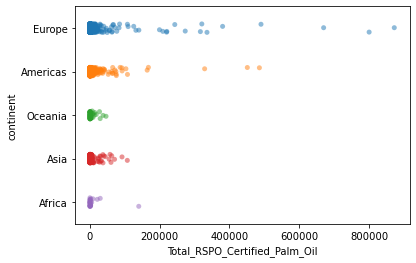

In [62]:
sns.stripplot(df3.Total_RSPO_Certified_Palm_Oil, df3.continent,alpha=0.5);

# Certified Palm Oil Uptake

### Overview Continent usage of Palm Oil & Certified Palm Oil with Companies Count

In [63]:
table = pd.pivot_table(df3,index=['continent'], values=['Member_Name','Total_Palm_Oil','Total_RSPO_Certified_Palm_Oil'], aggfunc={'Member_Name':'count','Total_Palm_Oil':'sum','Total_RSPO_Certified_Palm_Oil':'sum'}, margins=True, fill_value='0.0')
table.reset_index()
table = table.rename(columns={'Member_Name': '#Company'})
table

,#Company,Total_Palm_Oil,Total_RSPO_Certified_Palm_Oil
continent,,,
Africa,28,1041995.84,217686.51
Americas,382,6495173.06,4033392.85
Asia,259,9529605.04,1181347.11
Europe,1317,15038106.66,9714175.49
Oceania,59,1116682.27,256474.05
All,2045,33221562.87,15403076.01


### Global Certified Palm Oil Uptake (46%)

In [64]:
Global_uptake = (df3['Total_RSPO_Certified_Palm_Oil'].sum(axis=0)/df3['Total_Palm_Oil'].sum(axis=0))*100
Global_uptake

46.364694130357755

In [65]:
#df3['Total_Palm_Oil'].sum(axis=0)

In [66]:
#df3['Total_RSPO_Certified_Palm_Oil'].sum(axis=0)

### Global uptake increase in year 2020 compare to year 2019 (relationship btwn palm oil & certified palm oil)

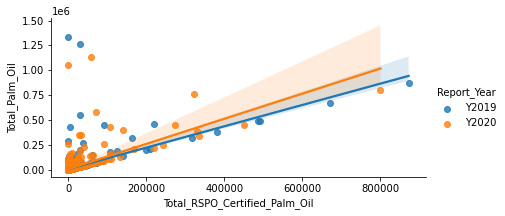

In [67]:
sns.pairplot(df3,hue='Report_Year', y_vars=['Total_Palm_Oil'],x_vars=['Total_RSPO_Certified_Palm_Oil'],kind='reg',height=3, aspect=2);

### Uptake skwed to right (high uptake) 

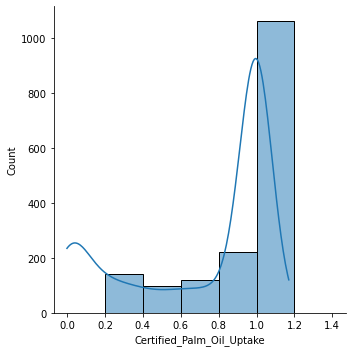

In [68]:
sns.displot(df3.Certified_Palm_Oil_Uptake, kde=True, bins=[0.2,0.4,0.6,0.8,1.0,1.2,1.4]) #rug to see density of data

### Uptake Table Details

In [69]:
df3['Certified_Palm_Oil_Uptake_Bins'] = pd.cut(df3.Certified_Palm_Oil_Uptake, bins=[0.0,0.2,0.4,0.6,0.8,1.0,1.2,1.4])

In [70]:
table = pd.pivot_table(df3,index=['Certified_Palm_Oil_Uptake_Bins'],columns=['Report_Year'], values='Certified_Palm_Oil_Uptake', aggfunc='count', margins=True, fill_value='0.0')
table.reset_index()

Report_Year,Certified_Palm_Oil_Uptake_Bins,Y2019,Y2020,All
0,"(0.0, 0.2]",149,136,285.0
1,"(0.2, 0.4]",73,67,140.0
2,"(0.4, 0.6]",46,52,98.0
3,"(0.6, 0.8]",63,57,120.0
4,"(0.8, 1.0]",626,625,1251.0
5,"(1.0, 1.2]",15,16,31.0
6,"(1.2, 1.4]",0,0,NaN
7,All,972,953,1925


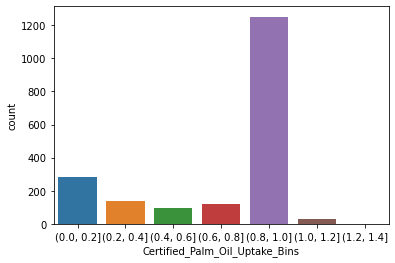

In [71]:
sns.countplot(x='Certified_Palm_Oil_Uptake_Bins',data=df3)

### Detail Uptake on each value e.g. 100% takeup 

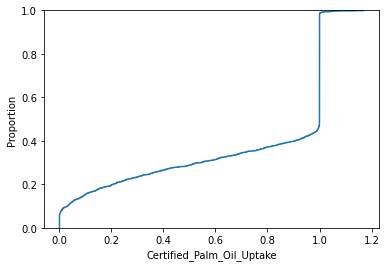

In [107]:
sns.ecdfplot(data=df3,x="Certified_Palm_Oil_Uptake")

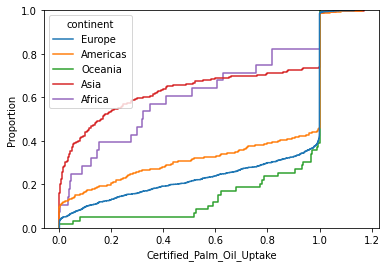

In [106]:
sns.ecdfplot(data=df3,x="Certified_Palm_Oil_Uptake", hue='continent')

In [103]:
#df3.Certified_Palm_Oil_Uptake.value_counts()

### There are 1032 members which uptake is 100%

In [72]:
company_100pct_uptake = df3[df3.Certified_Palm_Oil_Uptake==1.0][['Member_Name','Country','Certified_Palm_Oil_Uptake']]
company_100pct_uptake.shape

(1032, 3)

In [73]:
company_100pct_uptake.head()

,Member_Name,Country,Certified_Palm_Oil_Uptake
0,B.V. Vurense Snack Industrie dba Hearthside Europe,Netherlands,1.0
1,Rascal Confectionery Limited,United Kingdom,1.0
2,G.H. SHELDON WHOLESALE BAKERS LIMITED,United Kingdom,1.0
3,"Conditess, Feine Kuchen GmbH",Germany,1.0
4,Banketbakkerij Merba B.V.,Netherlands,1.0


### There are 31 members which uptake more than 100%

In [126]:
company_high_uptake = df3[df3.Certified_Palm_Oil_Uptake>1.0][['Member_Name','Report_Year','Country','Certified_Palm_Oil_Uptake']].sort_values(by='Certified_Palm_Oil_Uptake',ascending=False)

In [127]:
company_high_uptake.shape #total company high uptake

(31, 4)

### Top 5 highest member uptake (Year 2020)

In [135]:
company_high_uptake[company_high_uptake.Report_Year=='Y2020'].head(5)

,Member_Name,Report_Year,Country,Certified_Palm_Oil_Uptake
1576,"MORINAGA MILK INDUSTRY CO.,LTD.",Y2020,Japan,1.1702
1579,cosnova Beauty GmbH,Y2020,Germany,1.1332
1251,"Aroma Bay Candles Co., Ltd",Y2020,Vietnam,1.0643
1495,GlaxoSmithKline Consumer Healthcare Holdings Limited,Y2020,United Kingdom,1.0526
1319,Emil Kiessling GmbH,Y2020,Germany,1.0452


### Top 5 highest member uptake (Year 2019)

In [136]:
company_high_uptake[company_high_uptake.Report_Year=='Y2019'].head(5)

,Member_Name,Report_Year,Country,Certified_Palm_Oil_Uptake
774,"John B. Sanfilippo & Son, Inc.",Y2019,United States,1.1646
393,The Father's Table,Y2019,United States,1.0818
455,cosnova Beauty GmbH,Y2019,Germany,1.0726
716,PAN Surgelati Srl,Y2019,Italy,1.0548
623,"Dianne's Fine Desserts, Inc",Y2019,United States,1.0405


### Uptake by Conitent and Year

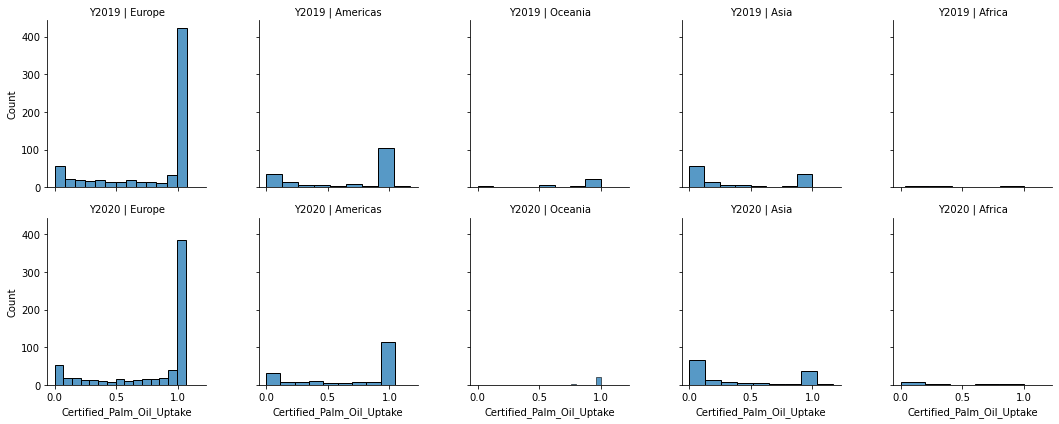

In [77]:
g = sns.FacetGrid(df3, col='continent', row='Report_Year')
g.map(sns.histplot,"Certified_Palm_Oil_Uptake")
g.set_titles(col_template='{col_name}', row_template='{row_name}');

In [78]:
dfr = df3[['Est_Distribution_RSPO_Certified_Europe',
       'Est_Distribution_RSPO_Certified_North_America',
       'Est_Distribution_RSPO_Certified_Malaysia',
       'Est_Distribution_RSPO_Certified_Indonesia',
       'Est_Distribution_RSPO_Certified_China',
       'Est_Distribution_RSPO_Certified_India',
       'Est_Distribution_RSPO_Certified_Latin_America',
       'Est_Distribution_RSPO_Certified_Africa',
       'Est_Distribution_RSPO_Certified_Rest_of_World','Total_RSPO_Certified_Palm_Oil']]

In [79]:
dfr.head()

,Est_Distribution_RSPO_Certified_Europe,Est_Distribution_RSPO_Certified_North_America,Est_Distribution_RSPO_Certified_Malaysia,Est_Distribution_RSPO_Certified_Indonesia,Est_Distribution_RSPO_Certified_China,Est_Distribution_RSPO_Certified_India,Est_Distribution_RSPO_Certified_Latin_America,Est_Distribution_RSPO_Certified_Africa,Est_Distribution_RSPO_Certified_Rest_of_World,Total_RSPO_Certified_Palm_Oil
0,80.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,117.00
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504.37
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.78
3,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3747.00
4,80.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,5306.00


In [80]:
list(dfr.columns)

['Est_Distribution_RSPO_Certified_Europe',
 'Est_Distribution_RSPO_Certified_North_America',
 'Est_Distribution_RSPO_Certified_Malaysia',
 'Est_Distribution_RSPO_Certified_Indonesia',
 'Est_Distribution_RSPO_Certified_China',
 'Est_Distribution_RSPO_Certified_India',
 'Est_Distribution_RSPO_Certified_Latin_America',
 'Est_Distribution_RSPO_Certified_Africa',
 'Est_Distribution_RSPO_Certified_Rest_of_World',
 'Total_RSPO_Certified_Palm_Oil']

In [81]:
df3['T_Dist_RSPO_Europe'] = (df3['Est_Distribution_RSPO_Certified_Europe']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_America'] = (df3['Est_Distribution_RSPO_Certified_North_America']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_Malaysia'] = (df3['Est_Distribution_RSPO_Certified_Malaysia']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_Indonesia'] = (df3['Est_Distribution_RSPO_Certified_Indonesia']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_China'] = (df3['Est_Distribution_RSPO_Certified_China']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_India'] = (df3['Est_Distribution_RSPO_Certified_India']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_Latin_America'] = (df3['Est_Distribution_RSPO_Certified_Latin_America']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_Africa'] = (df3['Est_Distribution_RSPO_Certified_Africa']*df3['Total_RSPO_Certified_Palm_Oil'])/100
df3['T_Dist_RSPO_North_Rest_of_World'] = (df3['Est_Distribution_RSPO_Certified_Rest_of_World']*df3['Total_RSPO_Certified_Palm_Oil'])/100

In [82]:
dfr_2 = df3[['T_Dist_RSPO_Europe','T_Dist_RSPO_North_America','T_Dist_RSPO_North_Malaysia','T_Dist_RSPO_North_Indonesia','T_Dist_RSPO_North_China','T_Dist_RSPO_North_India','T_Dist_RSPO_North_Latin_America','T_Dist_RSPO_North_Africa','T_Dist_RSPO_North_Rest_of_World','Total_RSPO_Certified_Palm_Oil']]

In [83]:
dfr_2.head()

,T_Dist_RSPO_Europe,T_Dist_RSPO_North_America,T_Dist_RSPO_North_Malaysia,T_Dist_RSPO_North_Indonesia,T_Dist_RSPO_North_China,T_Dist_RSPO_North_India,T_Dist_RSPO_North_Latin_America,T_Dist_RSPO_North_Africa,T_Dist_RSPO_North_Rest_of_World,Total_RSPO_Certified_Palm_Oil
0,93.60,8.19,0.0,0.0,0.0,0.0,0.0,0.0,15.21,117.00
1,504.37,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,504.37
2,64.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,64.78
3,3709.53,37.47,0.0,0.0,0.0,0.0,0.0,0.0,0.00,3747.00
4,4244.80,265.30,0.0,0.0,0.0,0.0,0.0,0.0,795.90,5306.00


In [84]:
test = (dfr_2.sum(axis=0) - df3['Total_RSPO_Certified_Palm_Oil']*2).fillna(0) #test

In [85]:
test.value_counts()

0.0    2055
dtype: int64

In [108]:
df3_unpivot = pd.melt(df3, id_vars=['Report_Year','Member_Name'], value_vars=['T_Dist_RSPO_Europe',
       'T_Dist_RSPO_North_America', 'T_Dist_RSPO_North_Malaysia',
       'T_Dist_RSPO_North_Indonesia', 'T_Dist_RSPO_North_China',
       'T_Dist_RSPO_North_India', 'T_Dist_RSPO_North_Latin_America',
       'T_Dist_RSPO_North_Africa', 'T_Dist_RSPO_North_Rest_of_World'])

In [123]:
t = df3_unpivot.sort_values(by='value',ascending=False)
t

,Report_Year,Member_Name,variable,value
496,Y2019,La Lorraine Bakery Group,T_Dist_RSPO_Europe,602870.40
681,Y2019,Zetar Limited,T_Dist_RSPO_Europe,441324.90
384,Y2019,S.A.L.P.A. Di Cherubini Domenico & C. S.A.S.,T_Dist_RSPO_Europe,311841.90
13034,Y2019,PepsiCo,T_Dist_RSPO_North_Latin_America,223447.76
17148,Y2019,Unilever,T_Dist_RSPO_North_Rest_of_World,209367.60
...,...,...,...,...
7595,Y2020,"AbiMar Foods, Inc",T_Dist_RSPO_North_Indonesia,0.00
7596,Y2020,In 2 Food Group (Pty) Ltd,T_Dist_RSPO_North_Indonesia,0.00
7597,Y2020,ALICORP S.A.A.,T_Dist_RSPO_North_Indonesia,0.00
7598,Y2020,"LITTLE DUTCH BOY BAKERIES, INC.",T_Dist_RSPO_North_Indonesia,0.00


### Top 10 Member of Total Distribution of Certified Palm Oil

In [141]:
pd.pivot_table(t,index=['Member_Name'],columns=['variable'], values='value', aggfunc='sum', margins=True, fill_value='0.0').sort_values(by='All',ascending=False)[:10].iloc[1:,:]

variable,T_Dist_RSPO_Europe,T_Dist_RSPO_North_Africa,T_Dist_RSPO_North_America,T_Dist_RSPO_North_China,T_Dist_RSPO_North_India,T_Dist_RSPO_North_Indonesia,T_Dist_RSPO_North_Latin_America,T_Dist_RSPO_North_Malaysia,T_Dist_RSPO_North_Rest_of_World,All
Member_Name,,,,,,,,,,
Unilever,226165.94,242171.3,33452.66,66905.32,150536.97,376702.91,141813.32,17447.3,417437.28,1672633.0
PepsiCo,114850.44,81204.48,23249.2,112427.04,49624.96,0.0,394879.44,0.0,160656.44,936892.0
La Lorraine Bakery Group,603901.422,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67100.158,671001.58
"Mondelez International, Inc",198602.89,13041.76,146814.45,78439.86,39125.28,35959.49,81416.35,6520.88,52167.04,652088.0
Nestl√© S.A.,191887.43,23003.79,4936.14,0.0,4408.7,4936.14,48401.11,127812.2,88228.49,493614.0
Zetar Limited,441324.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49036.1,490361.0
Upfield Europe B.V.,287499.36,28550.55,68385.585,0.0,0.0,46014.73,0.0,0.0,12161.275,442611.5
Ferrero Trading Lux S.A.,323693.12,4286.62,42866.2,8573.24,6376.62,2196.62,19236.48,2196.62,19236.48,428662.0
S.A.L.P.A. Di Cherubini Domenico & C. S.A.S.,312178.1,7614.1,0.0,0.0,3807.05,38070.5,3807.05,0.0,15228.2,380705.0


In [142]:
#t.groupby(['Report_Year','Member_Name'], as_index=False)['value'].sum().sort_values(by='value',ascending=False)

# Distribution Certified Palm Oil (Customer)

### Distribution Certified Palm Oil by Country (Not sum up)

C:\Users\S54201\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


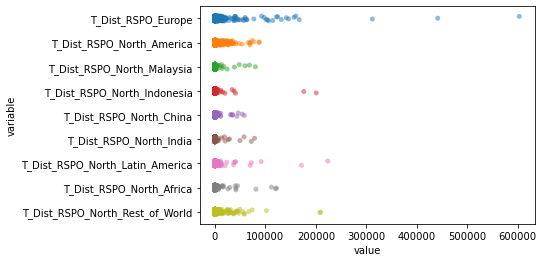

In [110]:
sns.stripplot(df3_unpivot.value, df3_unpivot.variable,alpha=0.5);

In [111]:
h = df3_unpivot.groupby(['variable', 'Report_Year'], as_index=False)['value'].sum()

In [112]:
h

,variable,Report_Year,value
0,T_Dist_RSPO_Europe,Y2019,3.748544e+06
1,T_Dist_RSPO_Europe,Y2020,2.732305e+06
2,T_Dist_RSPO_North_Africa,Y2019,3.257551e+05
3,T_Dist_RSPO_North_Africa,Y2020,5.501288e+05
4,T_Dist_RSPO_North_America,Y2019,1.050291e+06
...,...,...,...
13,T_Dist_RSPO_North_Latin_America,Y2020,5.784805e+05
14,T_Dist_RSPO_North_Malaysia,Y2019,1.487962e+05
15,T_Dist_RSPO_North_Malaysia,Y2020,2.707659e+05
16,T_Dist_RSPO_North_Rest_of_World,Y2019,1.005936e+06


### Total Volume Distribution Certified Palm Oil by Country & Year

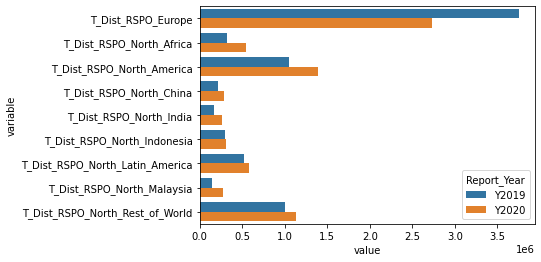

In [113]:
sns.barplot(x=h.value,y=h.variable, hue=h.Report_Year)

In [115]:
df3.head(3)

,Report_Year,Row ID,Member_Name,Membership_No,Membership_Sector,Membership_Cat,Country,MA_within_PO_Supply_Chain,TV_Crude_Palm_Oil,TV_Crude_Palm_Kernel_Oil,...,Certified_Palm_Oil_Uptake_Bins,T_Dist_RSPO_Europe,T_Dist_RSPO_North_America,T_Dist_RSPO_North_Malaysia,T_Dist_RSPO_North_Indonesia,T_Dist_RSPO_North_China,T_Dist_RSPO_North_India,T_Dist_RSPO_North_Latin_America,T_Dist_RSPO_North_Africa,T_Dist_RSPO_North_Rest_of_World
0,Y2019,0,B.V. Vurense Snack Industrie dba Hearthside Europe,9-0154-12-000-00,Supply Chain Associate,Associate,Netherlands,Food Good Manufacturer - third-party brand ‚ç∞,117.00,0.0,...,"(0.8, 1.0]",93.60,8.19,0.0,0.0,0.0,0.0,0.0,0.0,15.21
1,Y2019,1,Rascal Confectionery Limited,4-0755-16-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,Food Good Manufacturer - own brand ‚ç∞,504.37,0.0,...,"(0.8, 1.0]",504.37,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
2,Y2019,2,G.H. SHELDON WHOLESALE BAKERS LIMITED,4-0542-14-000-00,Consumer Goods Manufacturers,Ordinary,United Kingdom,"Food Good Manufacturer - own brand ‚ç∞,Food Good Manufacturer - third-party brand ‚ç∞",64.78,0.0,...,"(0.8, 1.0]",64.78,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00
